# Notebook for geochemistry attribute analyses for Chixculub Tektites 

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import seaborn as sns
from pyrolite.util.classification import TAS
from pyrolite.util.synthetic import normal_frame, random_cov_matrix
import pyrolite.plot
from pyrolite.plot import pyroplot
import sklearn

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
geochem_data = pd.read_csv('/Volumes/GoogleDrive/My Drive/Renne_Reading/Tektites/data/geochem_data.csv', header=0)
geochem_data['sample_no'] = [i[1] for i in geochem_data['Sample'].str.split('_')]
geochem_data.head()

,Sample,Point No.,Line,K2O,CaO,TiO2,SiO2,Al2O3,Na2O,MgO,FeO,MnO,Cl,SO3,Total,sample_no
0,D1_sph1,1,3837 G,0.86,21.26,0.62,51.57,13.85,2.46,4.29,4.55,0.16,0.01,0.02,99.65,sph1
1,D1_sph1,2,3838 G,0.61,24.94,0.60,48.62,12.88,1.80,4.52,4.86,0.12,0.00,0.25,99.21,sph1
2,D1_sph1,3,3839 G,1.34,17.58,0.63,54.09,13.99,3.07,3.66,4.34,0.13,-0.01,0.05,98.85,sph1
3,D1_sph1,4,3840 G,0.91,19.85,0.65,52.31,13.84,2.59,3.99,4.90,0.13,0.00,0.16,99.34,sph1
4,D1_sph1,5,3841 G,0.89,21.10,0.64,50.91,13.55,2.30,4.34,4.48,0.11,0.00,0.07,98.39,sph1


In [4]:
geochem_data_sample_mean = geochem_data.groupby(by='Sample').mean().drop(['Point No.', 'Total'], axis=1)
geochem_data_sample_mean.head()

,K2O,CaO,TiO2,SiO2,Al2O3,Na2O,MgO,FeO,MnO,Cl,SO3
Sample,,,,,,,,,,,
D1_sph1,0.863333,21.408333,0.633333,51.113333,13.550000,2.366667,4.256667,4.623333,0.130000,0.000000,0.111667
D1_sph10,1.010000,12.491667,0.690000,56.916667,15.401667,2.348333,4.373333,6.480000,0.185000,0.001667,0.051667
D1_sph11,1.005000,16.403333,0.620000,56.098333,14.400000,2.210000,4.221667,4.996667,0.136667,-0.003333,0.045000
D1_sph12,1.256667,9.848333,0.635000,61.396667,15.321667,2.790000,3.355000,5.513333,0.146667,-0.005000,0.016667
D1_sph14,1.022500,14.613750,0.658750,56.563750,15.348750,2.238750,4.196250,5.533750,0.152500,-0.003750,0.152500


In [5]:
geochem_data_sample_mean.columns

Index(['K2O', 'CaO', 'TiO2', 'SiO2', 'Al2O3', 'Na2O', 'MgO', 'FeO', 'MnO',
       'Cl', 'SO3'],
      dtype='object')

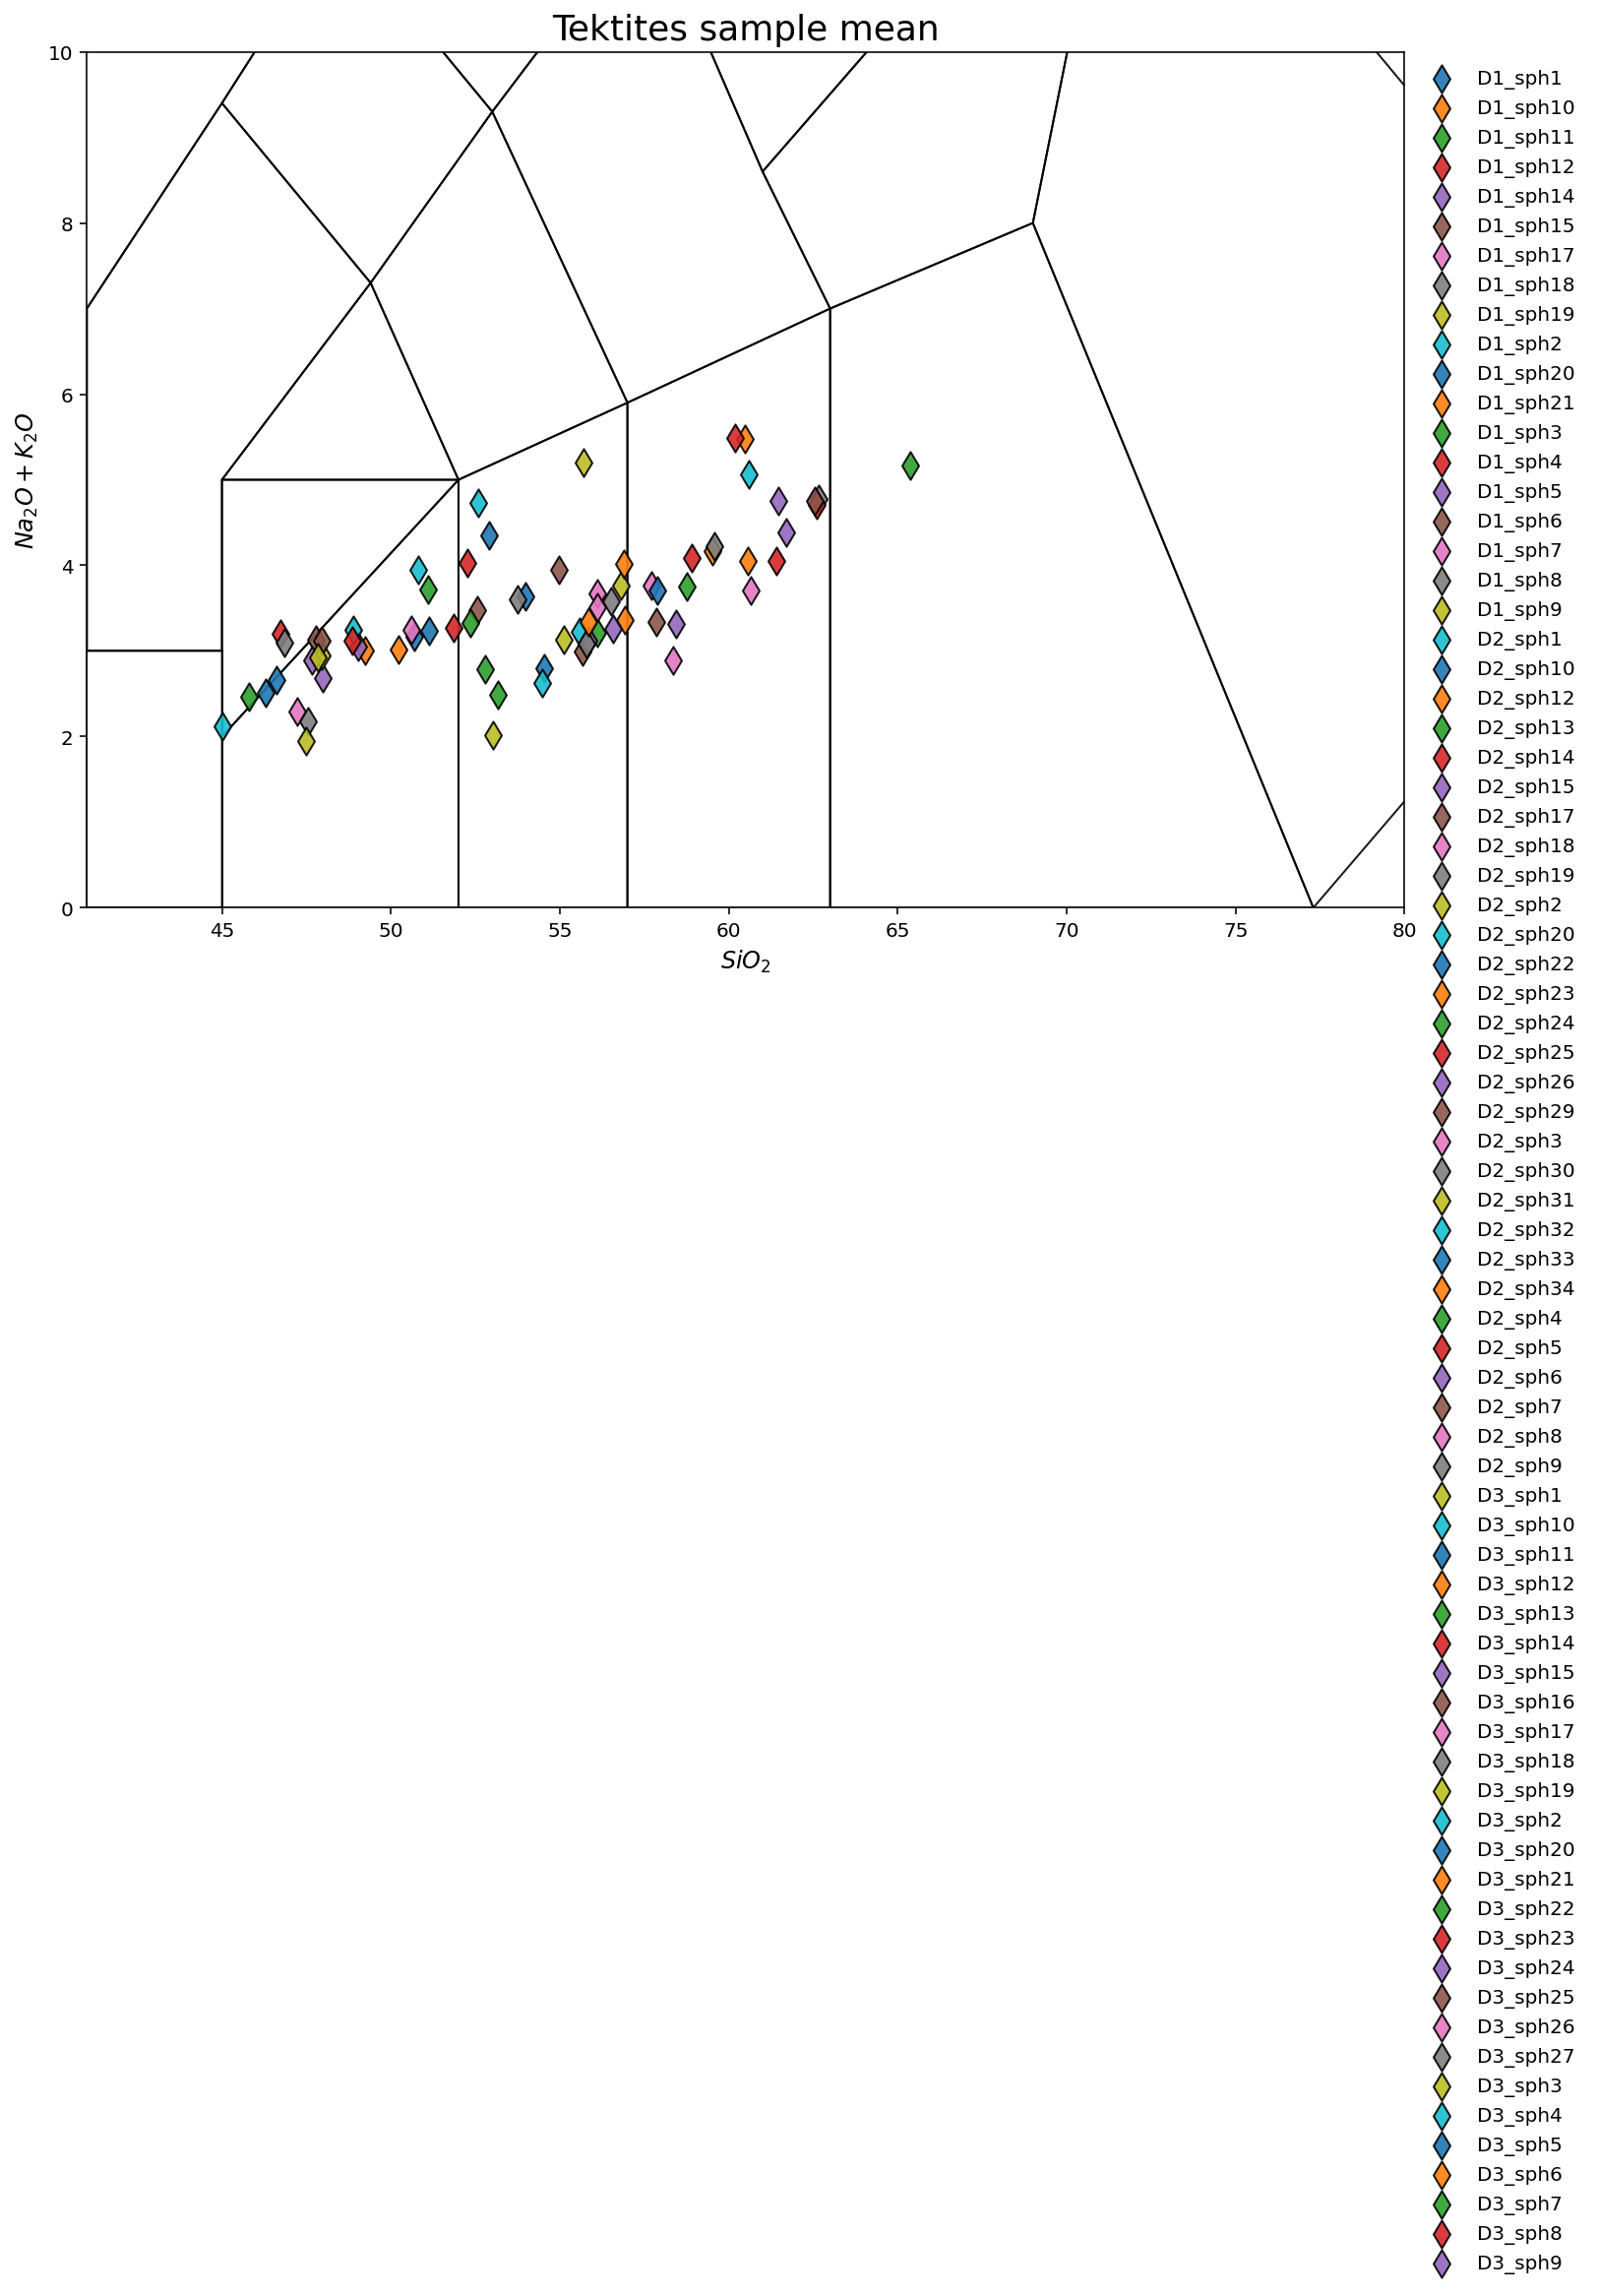

In [6]:
geochem_data_sample_mean["Na2O + K2O"] = geochem_data_sample_mean["Na2O"] + geochem_data_sample_mean["K2O"]
cm = TAS()

fig, ax = plt.subplots(figsize = (12,8))
for i in range(len(geochem_data_sample_mean["SiO2"])):
    ax.scatter(geochem_data_sample_mean["SiO2"].tolist()[i], geochem_data_sample_mean["Na2O + K2O"].tolist()[i], 100,
               c= 'C'+str(i), marker = 'd',
               edgecolor = 'black', alpha=0.9, label = geochem_data_sample_mean.index[i])
    
ax = cm.add_to_axes(ax, alpha=0.9, zorder=-1, axes_scale=100, labels='volcanic')
plt.margins(y=0)
plt.legend()
plt.xlim(41,80)
plt.ylim(0,10)
plt.title('Tektites sample mean', fontsize=18)
# plt.subplots_adjust(hspace=0)
plt.show()

## Plot harker diagrams

In [145]:
features = ['K2O', 'CaO', 'TiO2', 'Al2O3', 'Na2O', 'MgO', 'FeO', 'MnO']

IndexError: list index out of range

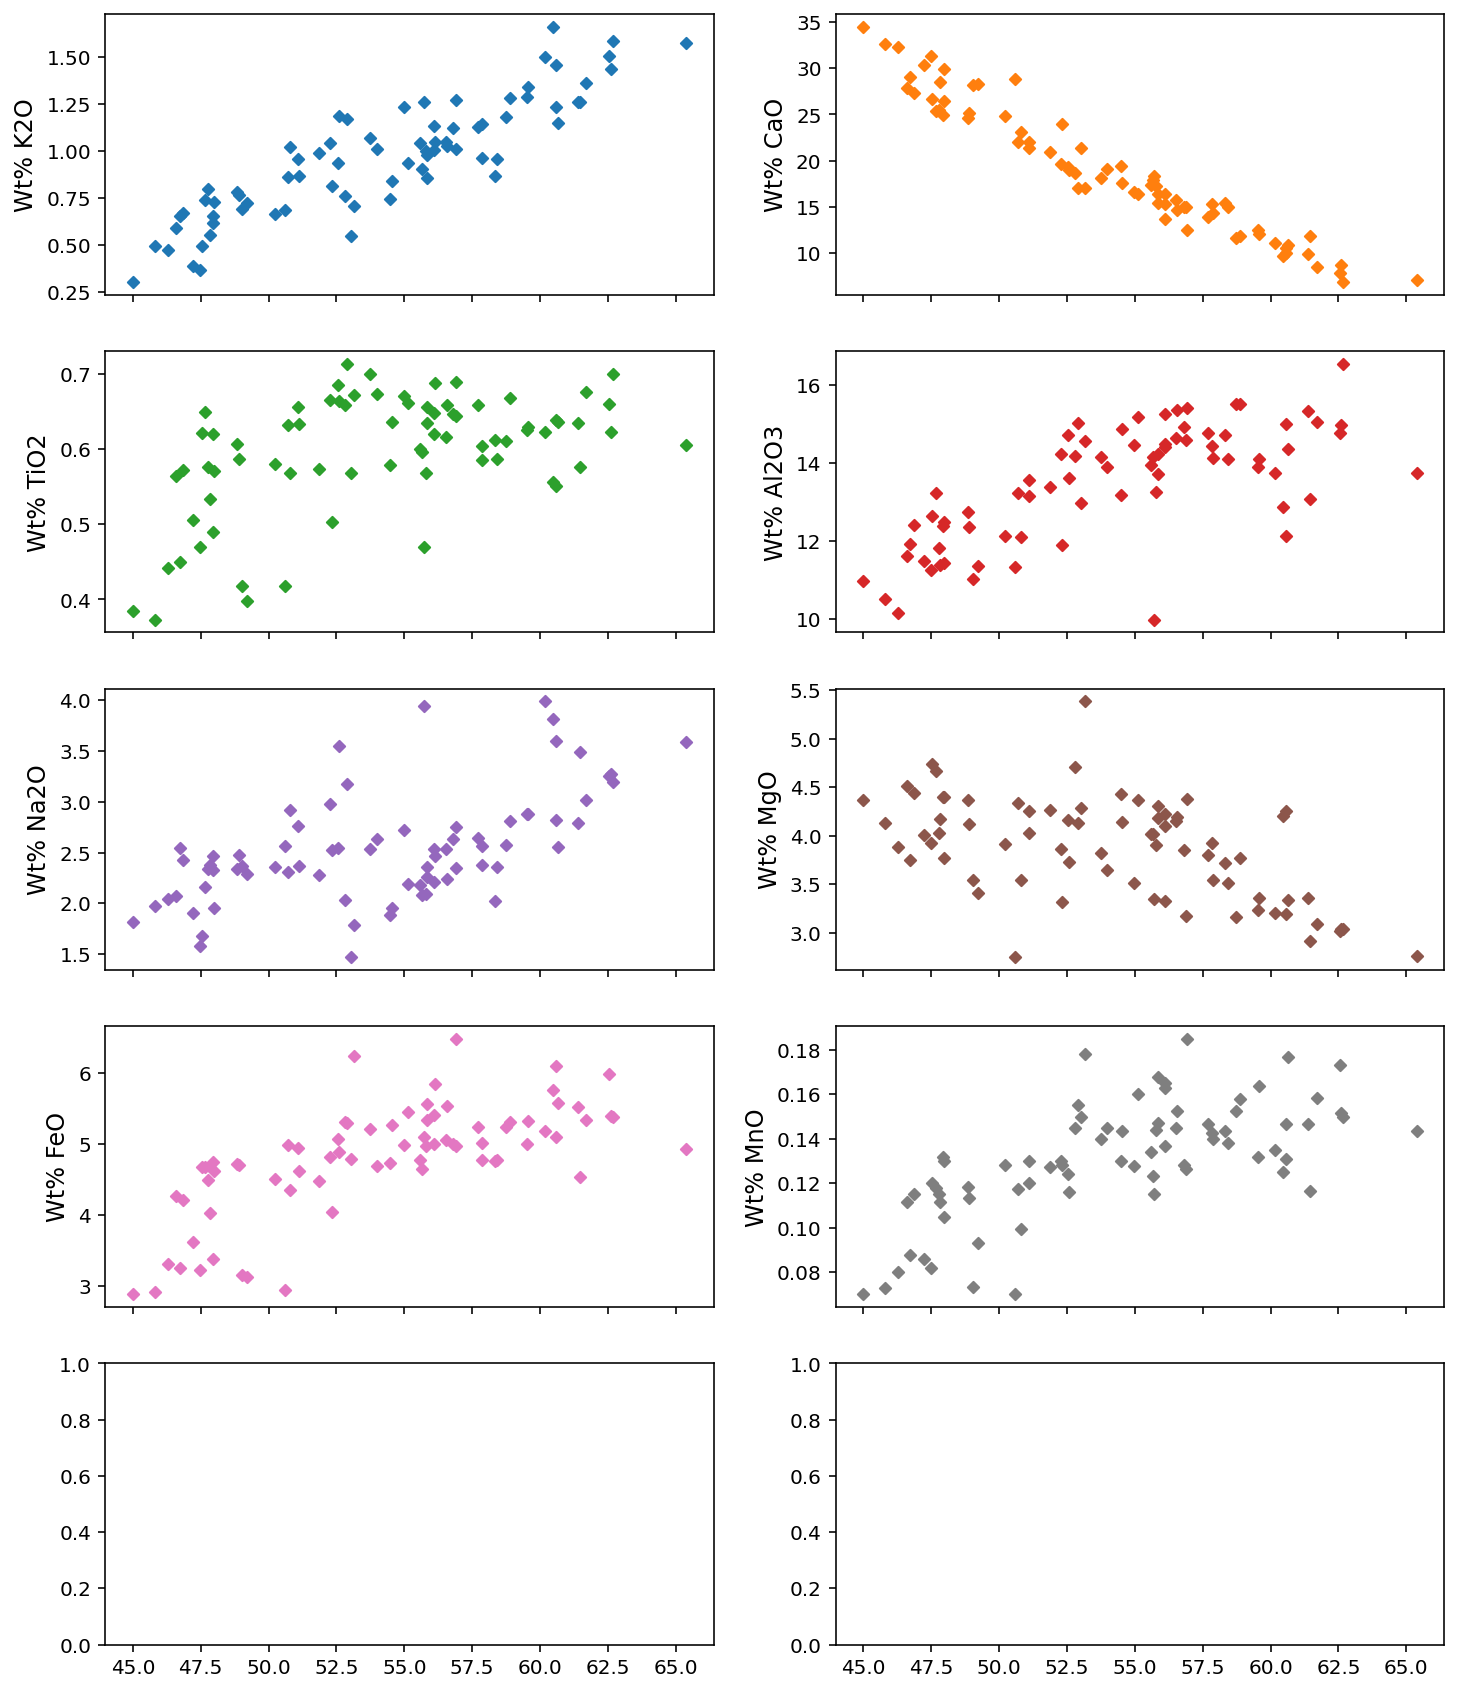

In [146]:
nrow = 5; ncol = 2;
fig, axs = plt.subplots(nrows=nrow, ncols=ncol, sharex=True, figsize=(12, 15))

i=0
for ax in axs.reshape(-1): 
    ax.scatter(geochem_data_sample_mean['SiO2'].tolist(), geochem_data_sample_mean[features[i]].tolist(), color = 'C'+str(i))
    ax.set_ylabel('Wt% ' + features[i])

    i = i + 1

plt.setp(axs[-1, :], xlabel='SiO2')
plt.tight_layout()
plt.show()

## Ternary diagram

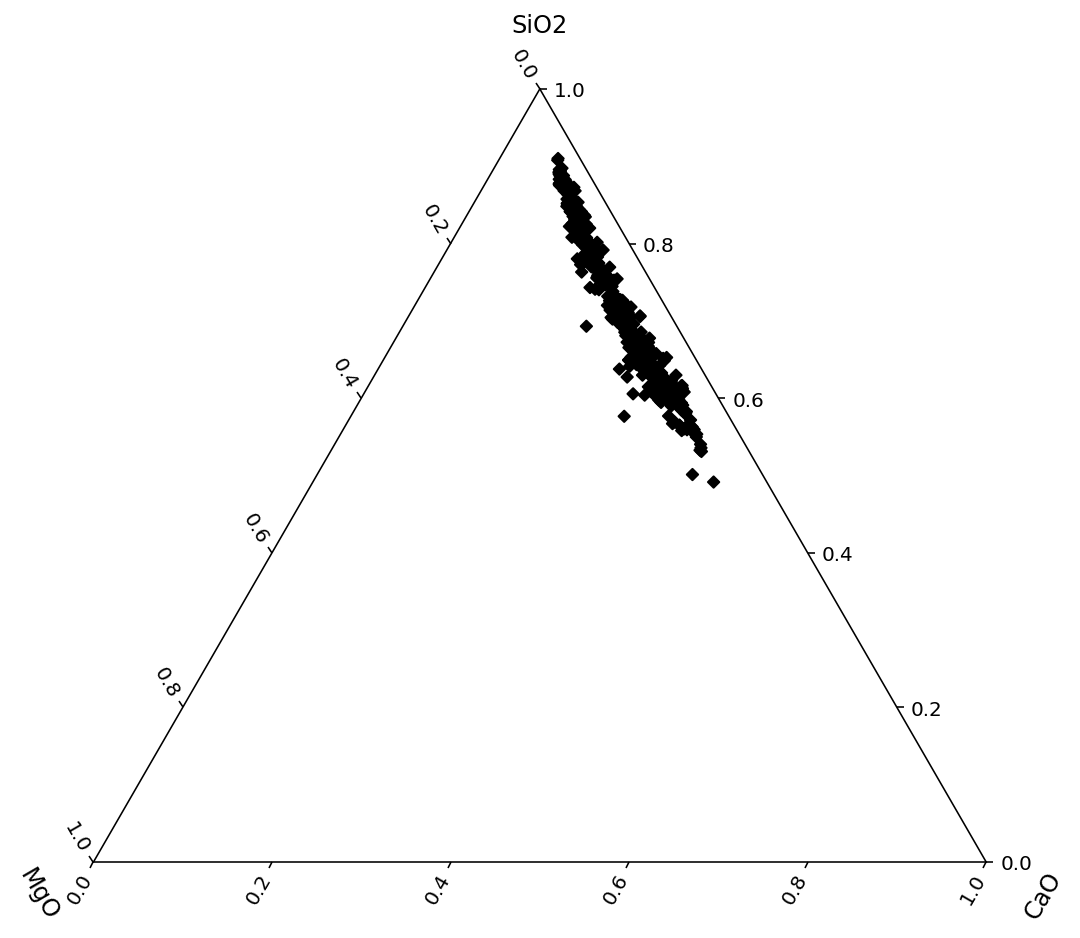

In [8]:
fig, ax = plt.subplots(1, figsize=(8,8))
ax = geochem_data.loc[:, ["SiO2", "MgO", "CaO"]].pyroplot.scatter(ax=ax, c="k")
plt.show()

## try PCA

In [9]:
x = geochem_data[features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# perform PCA analysis
pca = decomposition.PCA(n_components=5)

pca.fit(x)
x_pca = pca.transform(x)


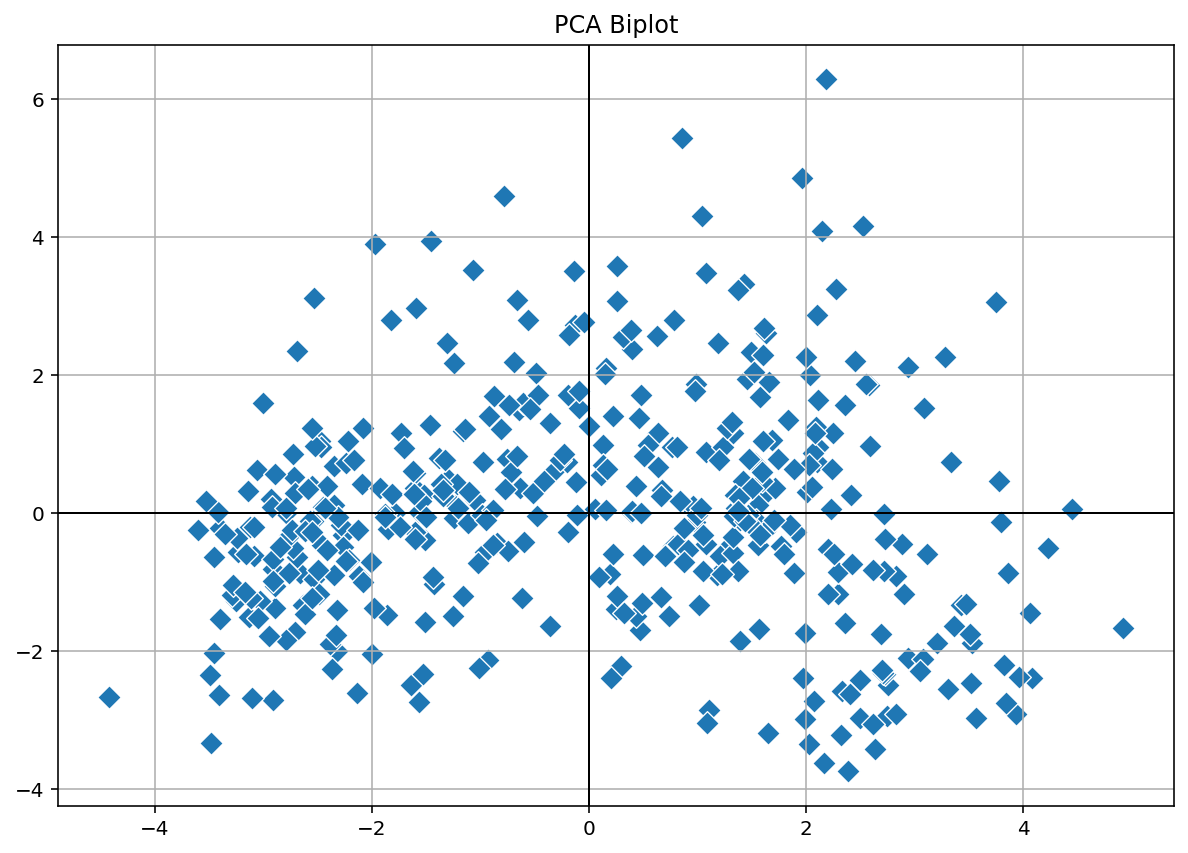

In [10]:
# plot figure
plt.figure(figsize=(10, 7))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], s=70)
plt.axhline(0, -1, 1, color = 'k')
plt.axvline(0, -1, 1, color = 'k')
plt.grid()
plt.title('PCA Biplot')
plt.show()

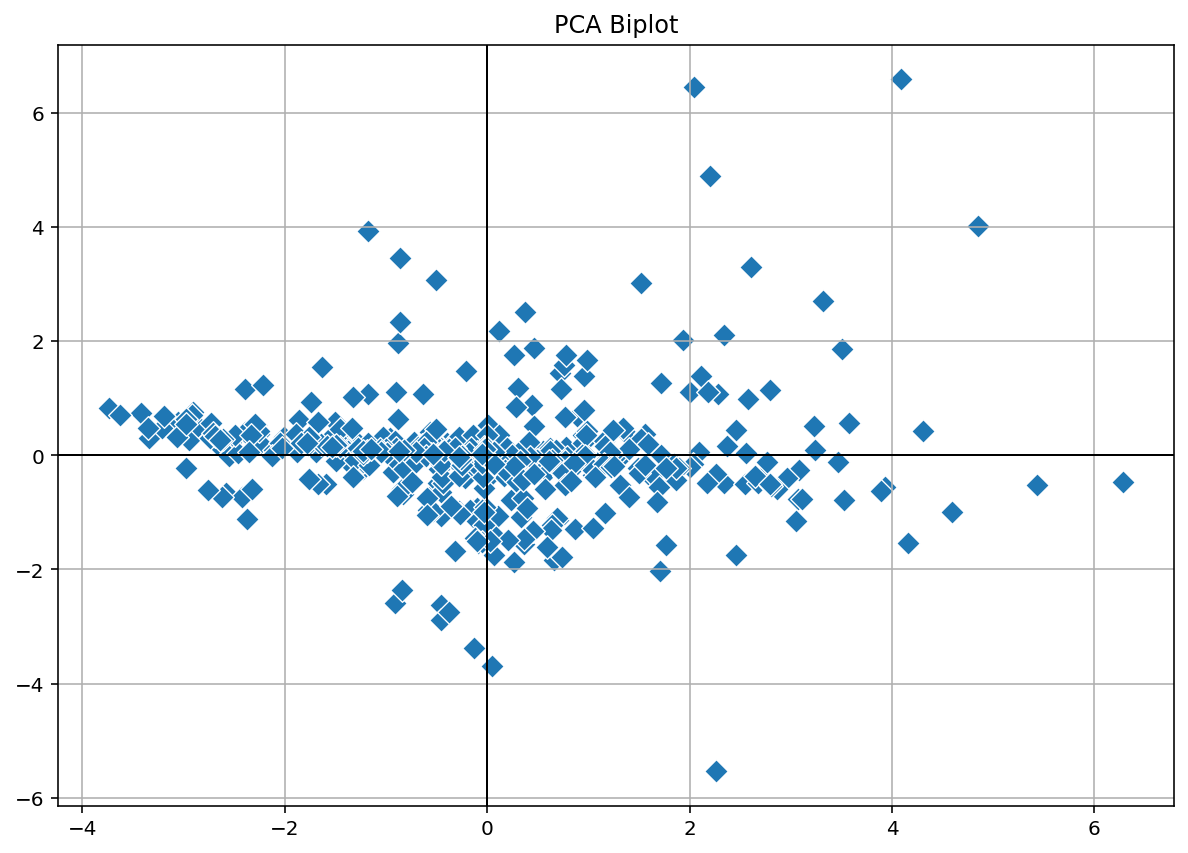

In [11]:
# plot figure
plt.figure(figsize=(10, 7))
sns.scatterplot(x=x_pca[:, 1], y=x_pca[:, 2], s=70)
plt.axhline(0, -1, 1, color = 'k')
plt.axvline(0, -1, 1, color = 'k')
plt.grid()
plt.title('PCA Biplot')
plt.show()

In [12]:
pca_fractions = pca.components_.T*3

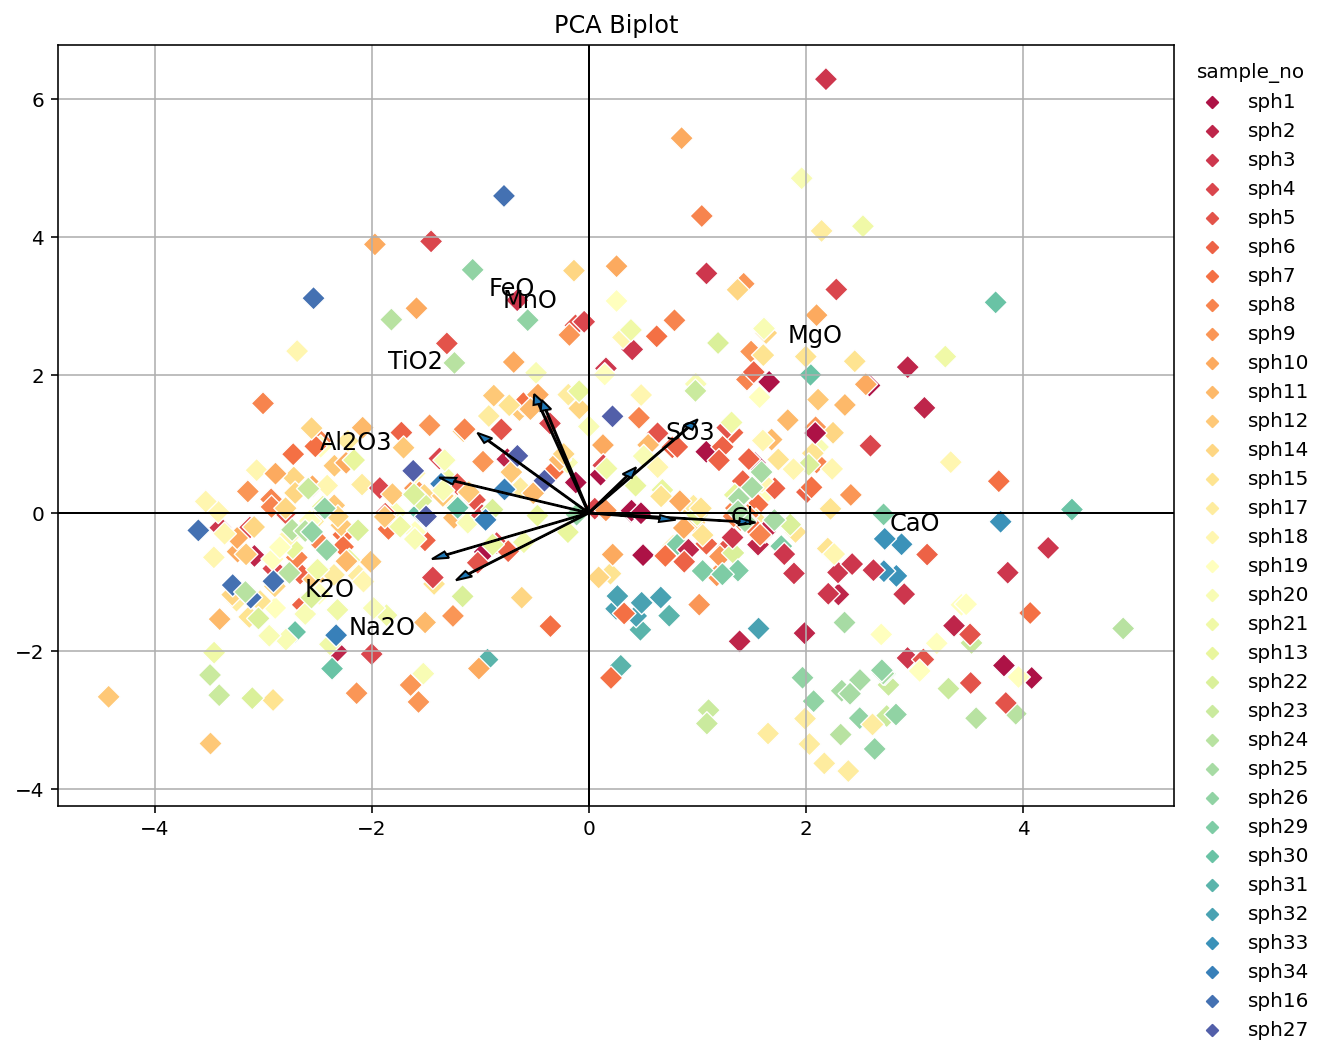

In [13]:
#first and second components:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], s=70, hue=geochem_data.sample_no, palette='Spectral')
for i in range(len(pca_fractions)):
    plt.arrow(0,0, pca_fractions[i][0], pca_fractions[i][1], width=0.01, head_width=0.1)
    plt.annotate(features[i], xy=(pca_fractions[i][0]*2, 
                                      pca_fractions[i][1]*2), fontsize=12 )
plt.axhline(0, -1, 1, color = 'k')
plt.axvline(0, -1, 1, color = 'k')
plt.grid()
# plt.gca().invert_yaxis()
plt.title('PCA Biplot')
plt.show()

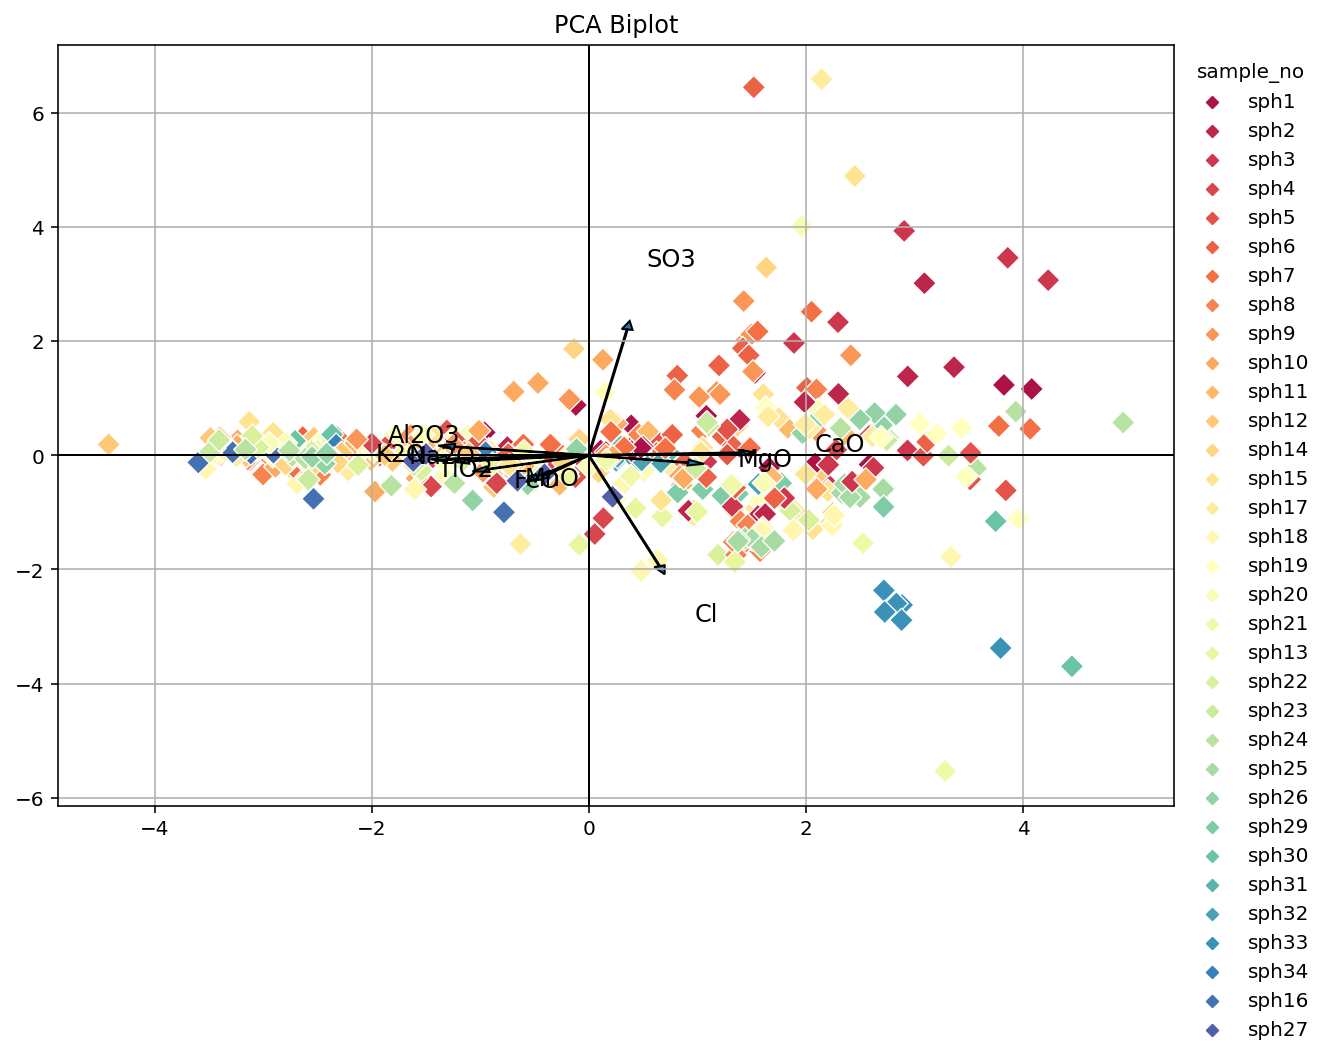

In [14]:
#First and third components:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 2], s=70, hue=geochem_data.sample_no, palette='Spectral')
for i in range(len(pca_fractions)):
    plt.arrow(0,0, pca_fractions[i][0], pca_fractions[i][2], width=0.01, head_width=0.1)
    plt.annotate(features[i], xy=(pca_fractions[i][0]*1.5, 
                                      pca_fractions[i][2]*1.5), fontsize=12 )
plt.axhline(0, -1, 1, color = 'k')
plt.axvline(0, -1, 1, color = 'k')
plt.grid()
# plt.gca().invert_yaxis()
plt.title('PCA Biplot')
plt.show()

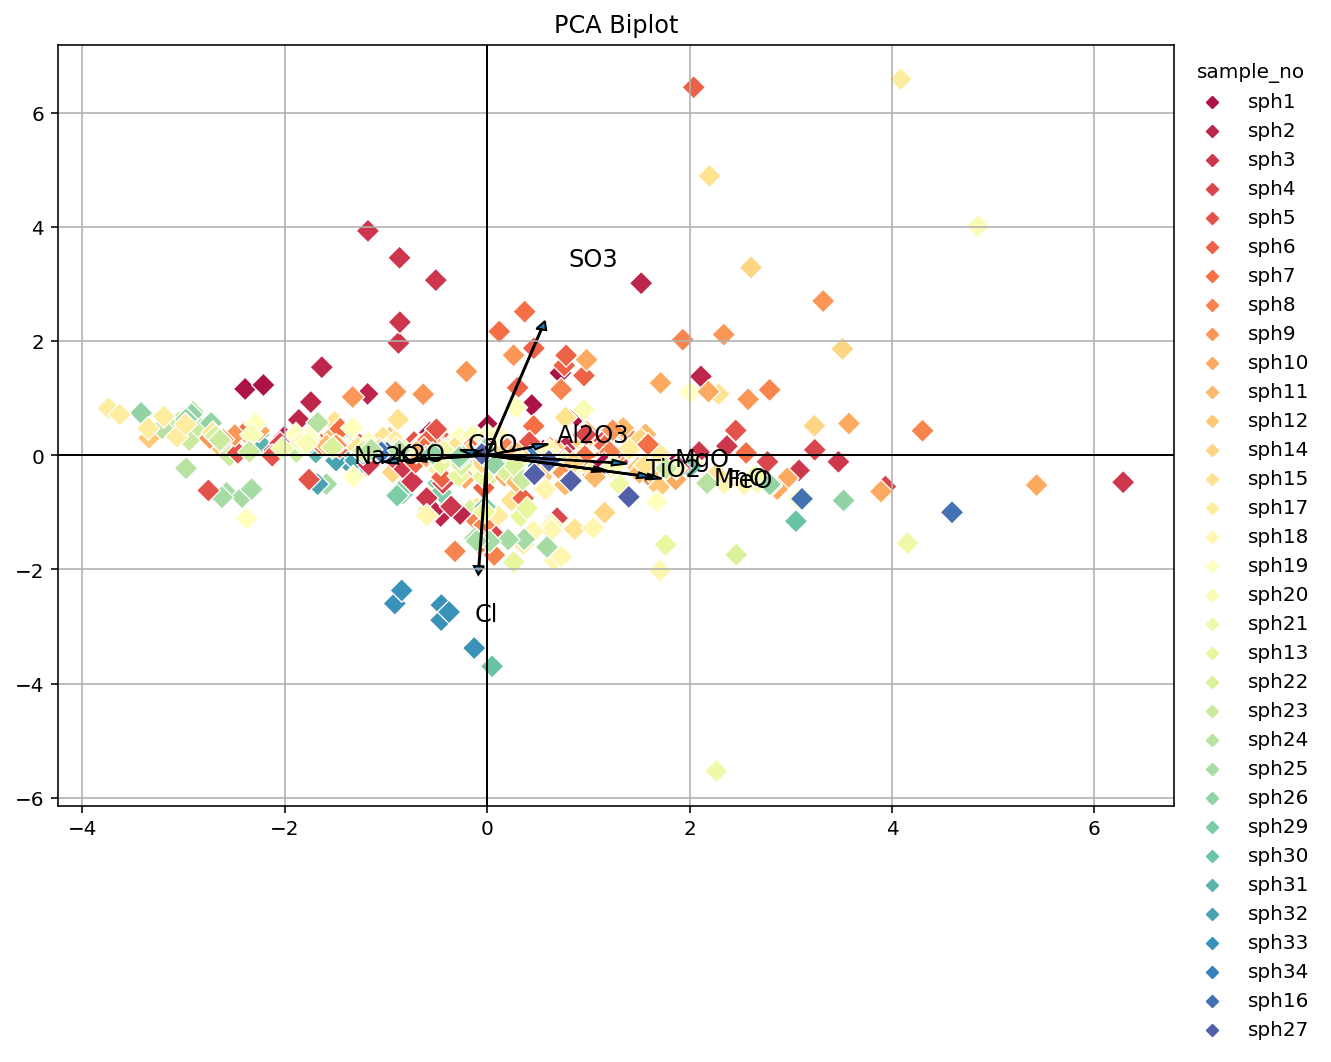

In [15]:
#second and third components
plt.figure(figsize=(10, 7))
sns.scatterplot(x=x_pca[:, 1], y=x_pca[:, 2], s=70, hue=geochem_data.sample_no, palette='Spectral')
for i in range(len(pca_fractions)):
    plt.arrow(0,0, pca_fractions[i][1], pca_fractions[i][2], width=0.01, head_width=0.1)
    plt.annotate(features[i], xy=(pca_fractions[i][1]*1.5, 
                                      pca_fractions[i][2]*1.5), fontsize=12 )
plt.axhline(0, -1, 1, color = 'k')
plt.axvline(0, -1, 1, color = 'k')
plt.grid()
# plt.gca().invert_yaxis()
plt.title('PCA Biplot')
plt.show()

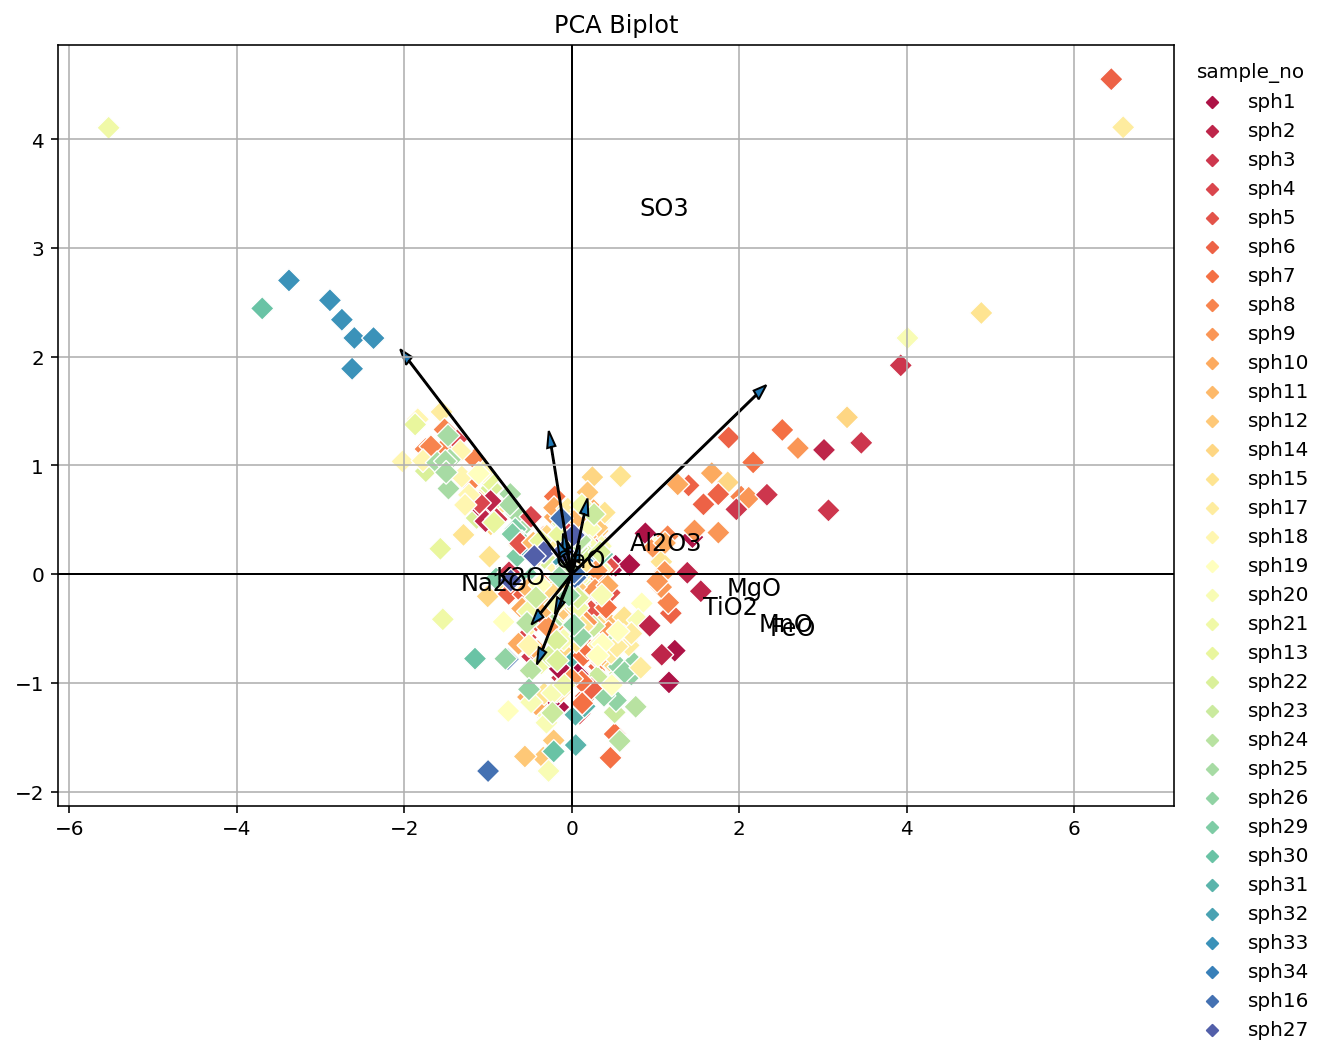

In [16]:
#Third and fourth components:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=x_pca[:, 2], y=x_pca[:, 3], s=70, hue=geochem_data.sample_no, palette='Spectral')
for i in range(len(pca_fractions)):
    plt.arrow(0,0, pca_fractions[i][2], pca_fractions[i][3], width=0.01, head_width=0.1)
    plt.annotate(features[i], xy=(pca_fractions[i][1]*1.5, 
                                      pca_fractions[i][2]*1.5), fontsize=12 )
plt.axhline(0, -1, 1, color = 'k')
plt.axvline(0, -1, 1, color = 'k')
plt.grid()
# plt.gca().invert_yaxis()
plt.title('PCA Biplot')
plt.show()

## Make Correlation Matrix

Text(0.5, 1.0, 'Major Oxide Correlation Matrix')

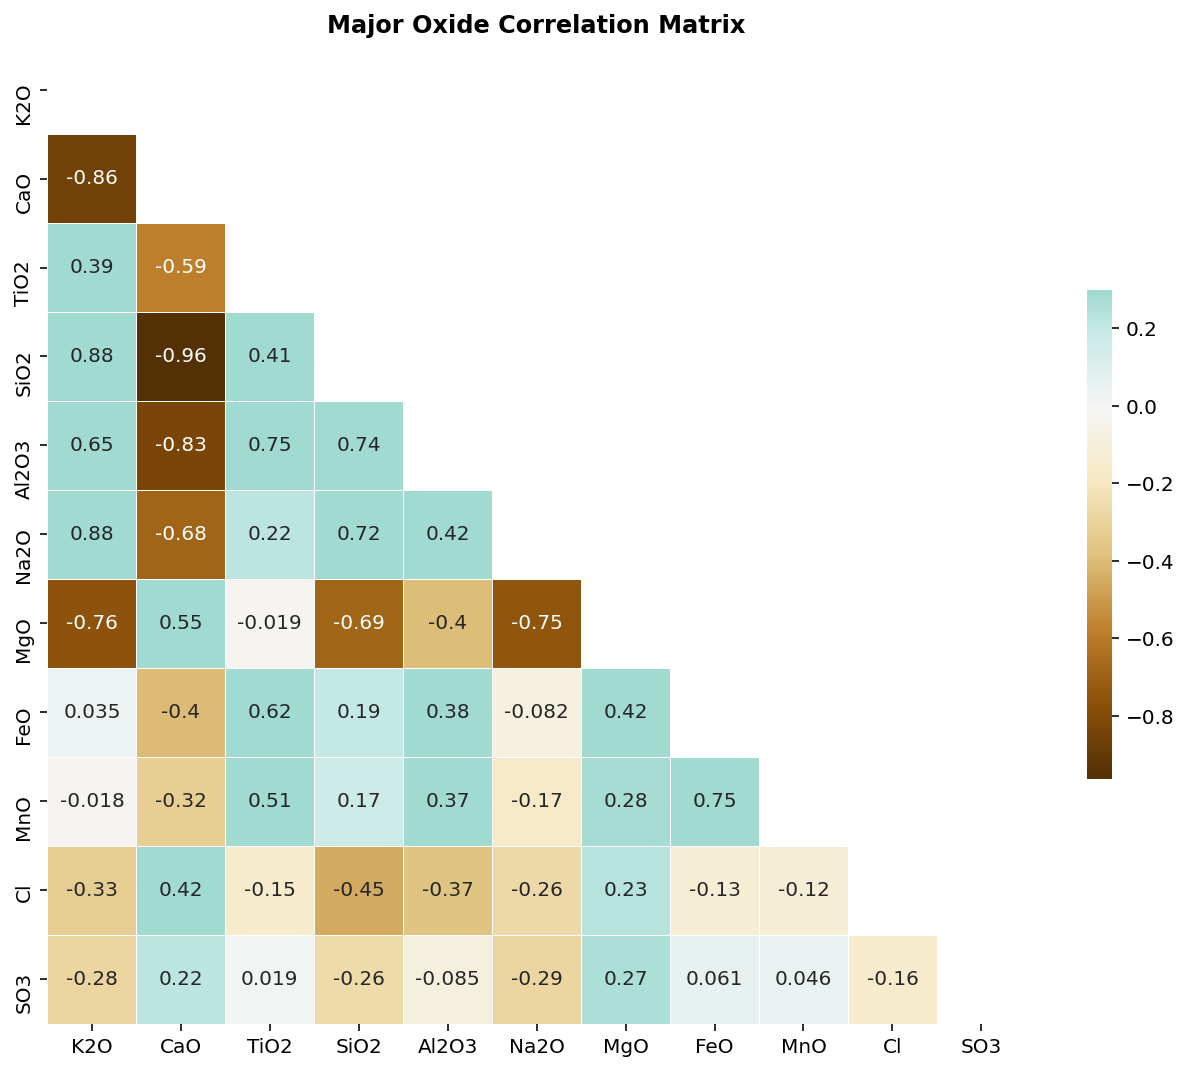

In [3]:
corr=geochem_data.corr(method='pearson')
corr.drop(['Point No.','Total'],axis=1,inplace=True)
corr.drop(['Total','Point No.'],axis=0,inplace=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(11, 9))
#cmap = sns.diverging_palette(220, 20, as_cmap=True)
cmap='BrBG'
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

ax.set_title('Major Oxide Correlation Matrix', fontsize=12,fontweight='bold')

In [5]:
plt.savefig('..\Tektites\corr_matrix.pdf',bbox='tight',dpi=300)

<Figure size 432x288 with 0 Axes>

#### Gorgonilla vs previous studies

In [31]:
fin_data = pd.read_csv('/Volumes/GoogleDrive/My Drive/Renne_Reading/Tektites/data/geochem_data_final.csv', header=0)
fin_data['sample_no'] = [i[1] for i in fin_data['Sample'].str.split('_')]
fin_data.head()

,Sample,Point No.,K2O,CaO,TiO2,SiO2,Al2O3,Na2O,MgO,FeO,MnO,Cl,SO3,P2O5,Total,sample_no
0,D1_sph1,1,0.86,21.26,0.62,51.57,13.85,2.46,4.29,4.55,0.16,0.01,0.02,NaN,99.65,sph1
1,D1_sph1,2,0.61,24.94,0.60,48.62,12.88,1.80,4.52,4.86,0.12,0.00,0.25,NaN,99.21,sph1
2,D1_sph1,3,1.34,17.58,0.63,54.09,13.99,3.07,3.66,4.34,0.13,-0.01,0.05,NaN,98.85,sph1
3,D1_sph1,4,0.91,19.85,0.65,52.31,13.84,2.59,3.99,4.90,0.13,0.00,0.16,NaN,99.34,sph1
4,D1_sph1,5,0.89,21.10,0.64,50.91,13.55,2.30,4.34,4.48,0.11,0.00,0.07,NaN,98.39,sph1


In [32]:
fin_data_sample_mean = fin_data.groupby(by='Sample').mean().drop(['Point No.', 'Total'], axis=1)
fin_data_sample_mean.head()

,K2O,CaO,TiO2,SiO2,Al2O3,Na2O,MgO,FeO,MnO,Cl,SO3,P2O5
Sample,,,,,,,,,,,,
D1_sph1,0.863333,21.408333,0.633333,51.113333,13.550000,2.366667,4.256667,4.623333,0.130000,0.000000,0.111667,NaN
D1_sph10,1.010000,12.491667,0.690000,56.916667,15.401667,2.348333,4.373333,6.414333,0.183500,0.000000,0.039500,0.080000
D1_sph11,1.005000,16.403333,0.620000,56.098333,14.400000,2.210000,4.221667,4.879000,0.138167,-0.000333,0.044667,0.096000
D1_sph12,1.256667,9.848333,0.635000,61.396667,15.321667,2.790000,3.355000,5.513333,0.146667,-0.005000,0.016667,NaN
D1_sph14,1.022500,14.613750,0.658750,56.563750,15.348750,2.238750,4.196250,5.519625,0.150000,-0.001375,0.175000,0.161667


In [125]:
bermudez = pd.read_csv('/Volumes/GoogleDrive/My Drive/Renne_Reading/Tektites/data/Bermudez.csv', header=0)
belza=pd.read_csv('/Volumes/GoogleDrive/My Drive/Renne_Reading/Tektites/data/Belza.csv', header=0)
izett=pd.read_csv('/Volumes/GoogleDrive/My Drive/Renne_Reading/Tektites/data/izett.csv', header=0)
kbrl_blck=pd.read_csv('/Volumes/GoogleDrive/My Drive/Renne_Reading/Tektites/data/koeberl_black.csv', header=0)
kbrl_ylw=pd.read_csv('/Volumes/GoogleDrive/My Drive/Renne_Reading/Tektites/data/koeberl_yellow.csv', header=0)

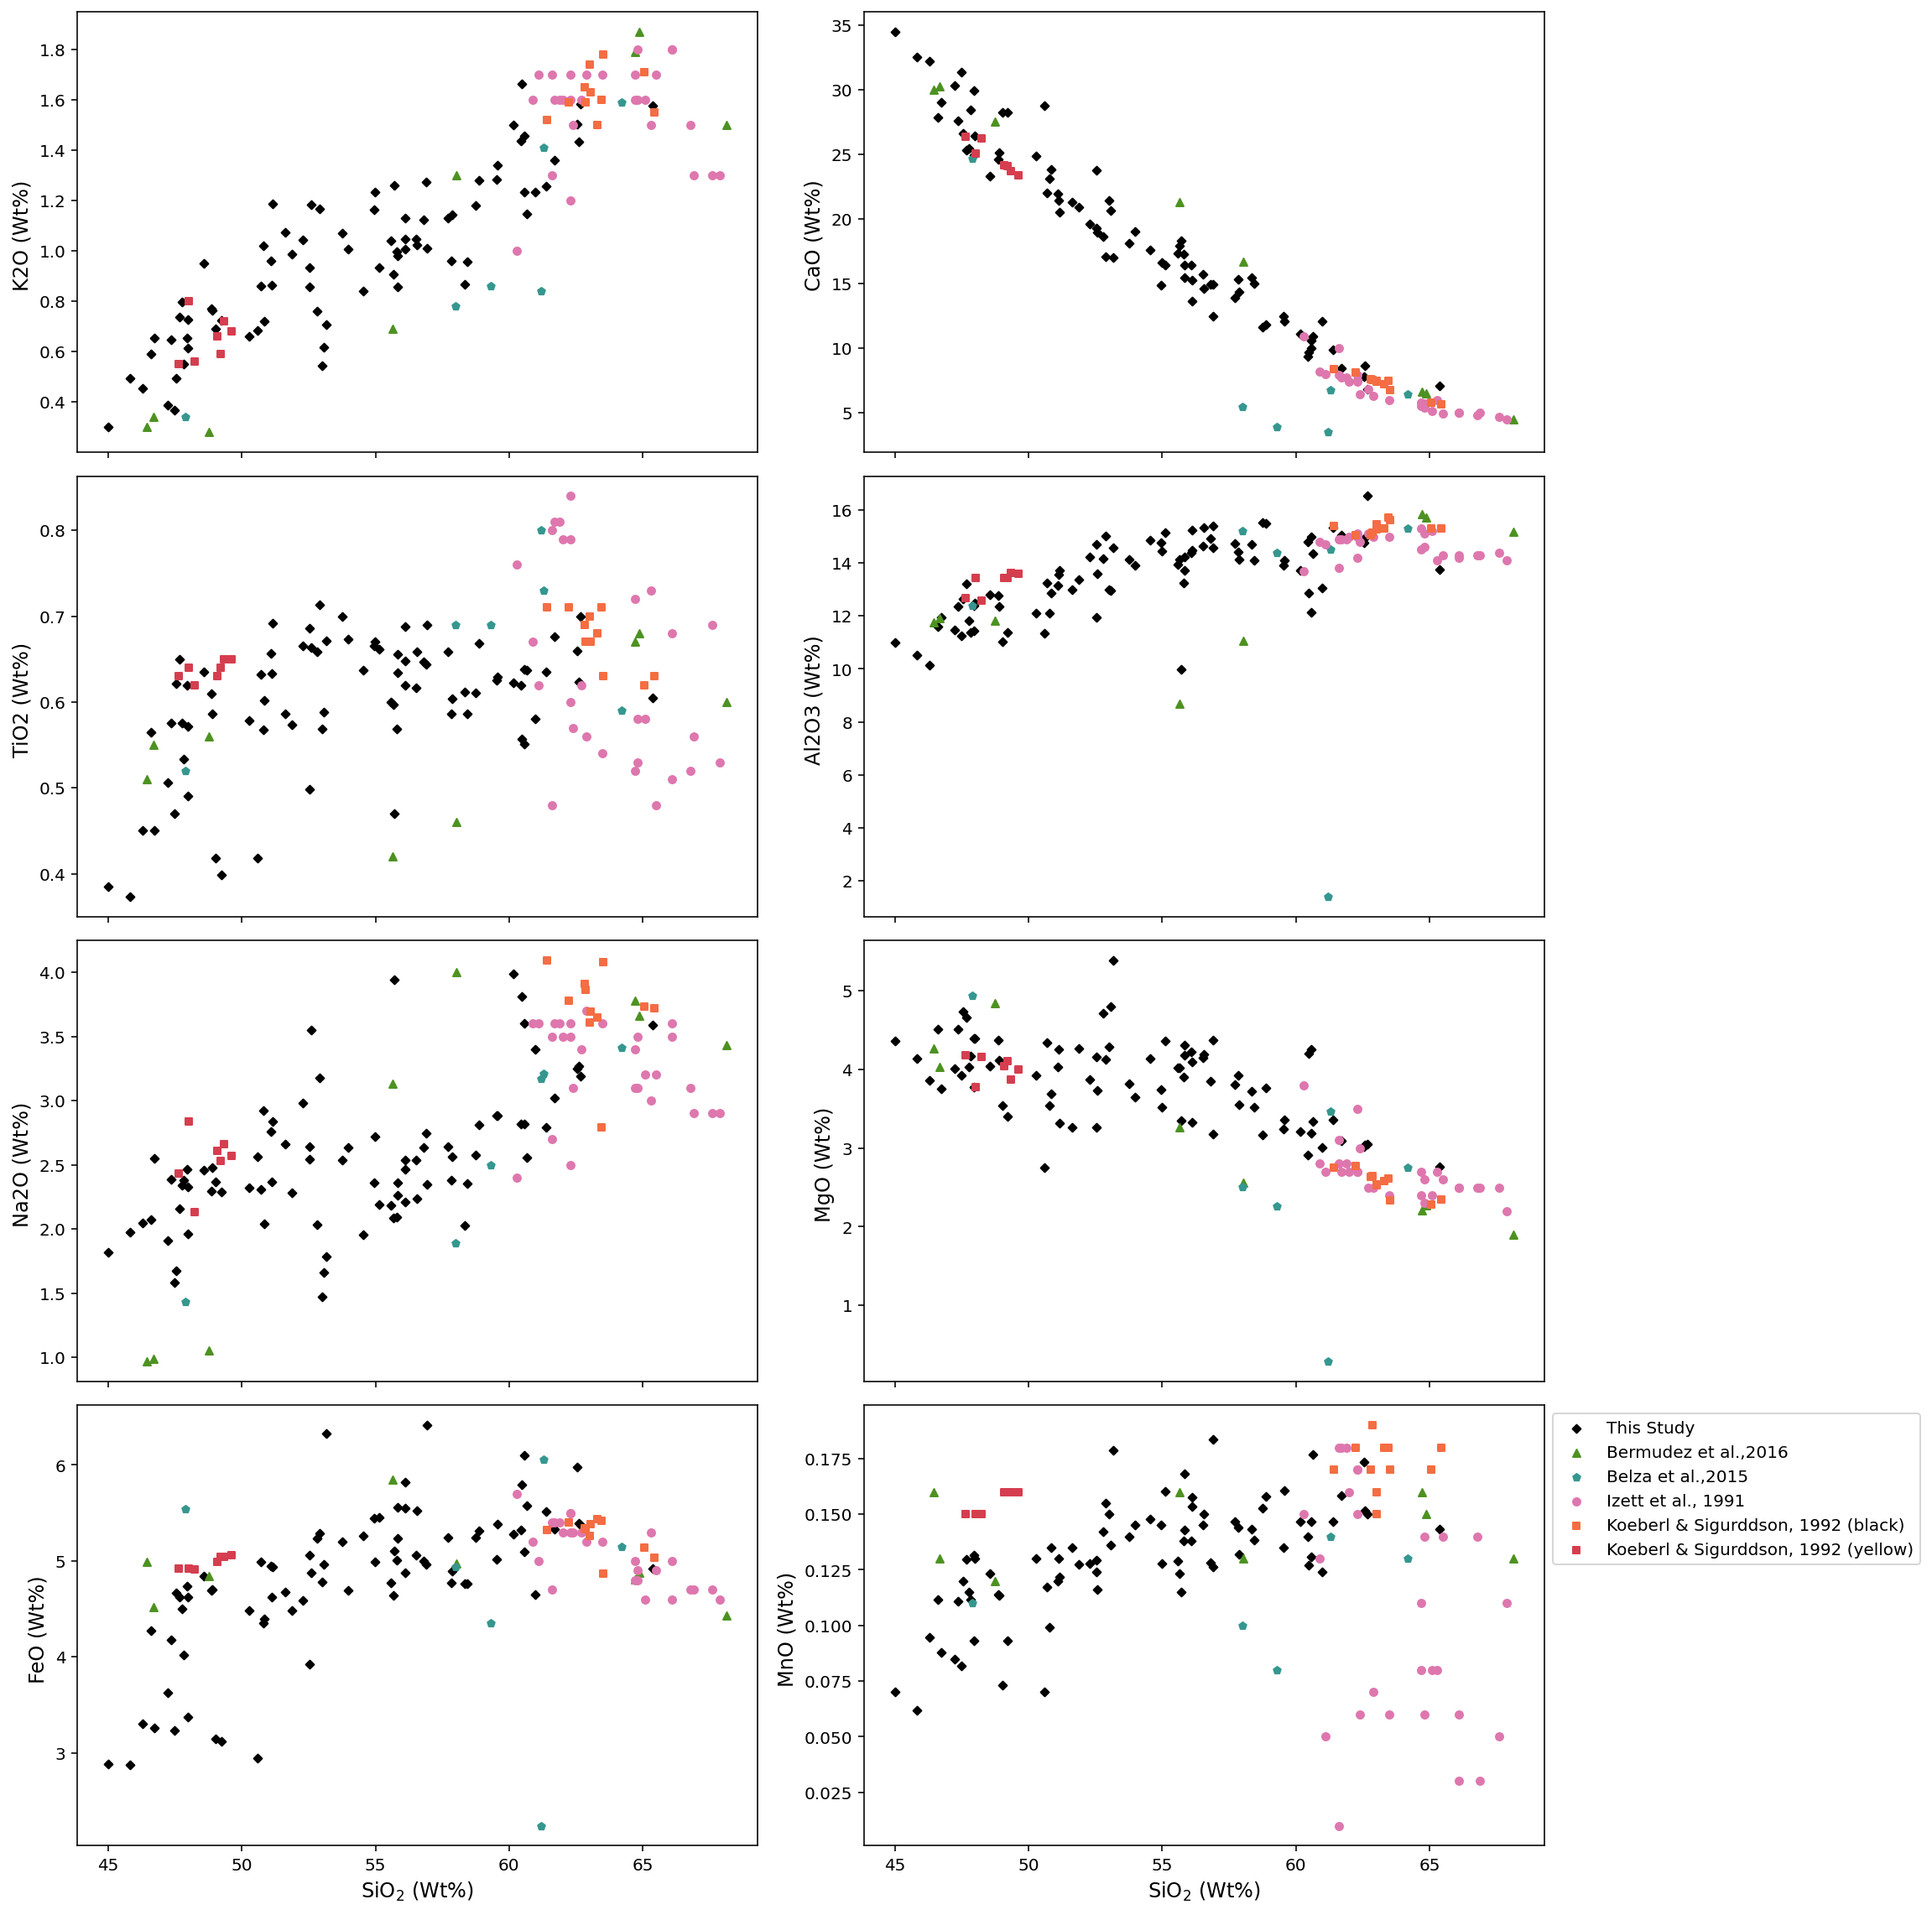

In [147]:
nrow = 4; ncol = 2;
fig, axs = plt.subplots(nrows=nrow, ncols=ncol, sharex=True, figsize=(13, 16))

i=0
for ax in axs.reshape(-1): 
    ax.scatter(fin_data_sample_mean['SiO2'].tolist(), fin_data_sample_mean[features[i]].tolist(),color = 'black', 
               s=12,label='This Study')
    ax.scatter(bermudez['SiO2'].tolist(), bermudez[features[i]].tolist(), marker= '^',s=20,color = '#4d9221',
               label='Bermudez et al.,2016')
    ax.scatter(belza['SiO2'].tolist(), belza[features[i]].tolist(), marker= 'p',s=20,color = '#35978f',
               label='Belza et al.,2015')
    ax.scatter(izett['SiO2'].tolist(), izett[features[i]].tolist(), marker= 'o',s=20,color = '#de77ae',
               label='Izett et al., 1991')
    ax.scatter(kbrl_blck['SiO2'].tolist(), kbrl_blck[features[i]].tolist(), marker= 's',s=20,color = '#f46d43',
               label='Koeberl & Sigurddson, 1992 (black)')
    ax.scatter(kbrl_ylw['SiO2'].tolist(), kbrl_ylw[features[i]].tolist(), marker= 's',s=20,color = '#d53e4f',
               label='Koeberl & Sigurddson, 1992 (yellow)')
    ax.set_ylabel(features[i]+ ' (Wt%) ')

    i = i + 1

plt.setp(axs[-1, :], xlabel='SiO$_2$ (Wt%)')
plt.tight_layout()
plt.legend(frameon=True)
plt.savefig('/Volumes/GoogleDrive/My Drive/Renne_Reading/Tektites/harker_oxides.pdf',dpi=300,
            bbox_inches='tight')


In [141]:
fin_data.columns

Index(['Sample', 'Point No.', 'K2O', 'CaO', 'TiO2', 'SiO2', 'Al2O3', 'Na2O',
       'MgO', 'FeO', 'MnO', 'Cl', 'SO3', 'P2O5', 'Total', 'sample_no'],
      dtype='object')

In [155]:
volatiles=['SO3','P2O5','Cl']

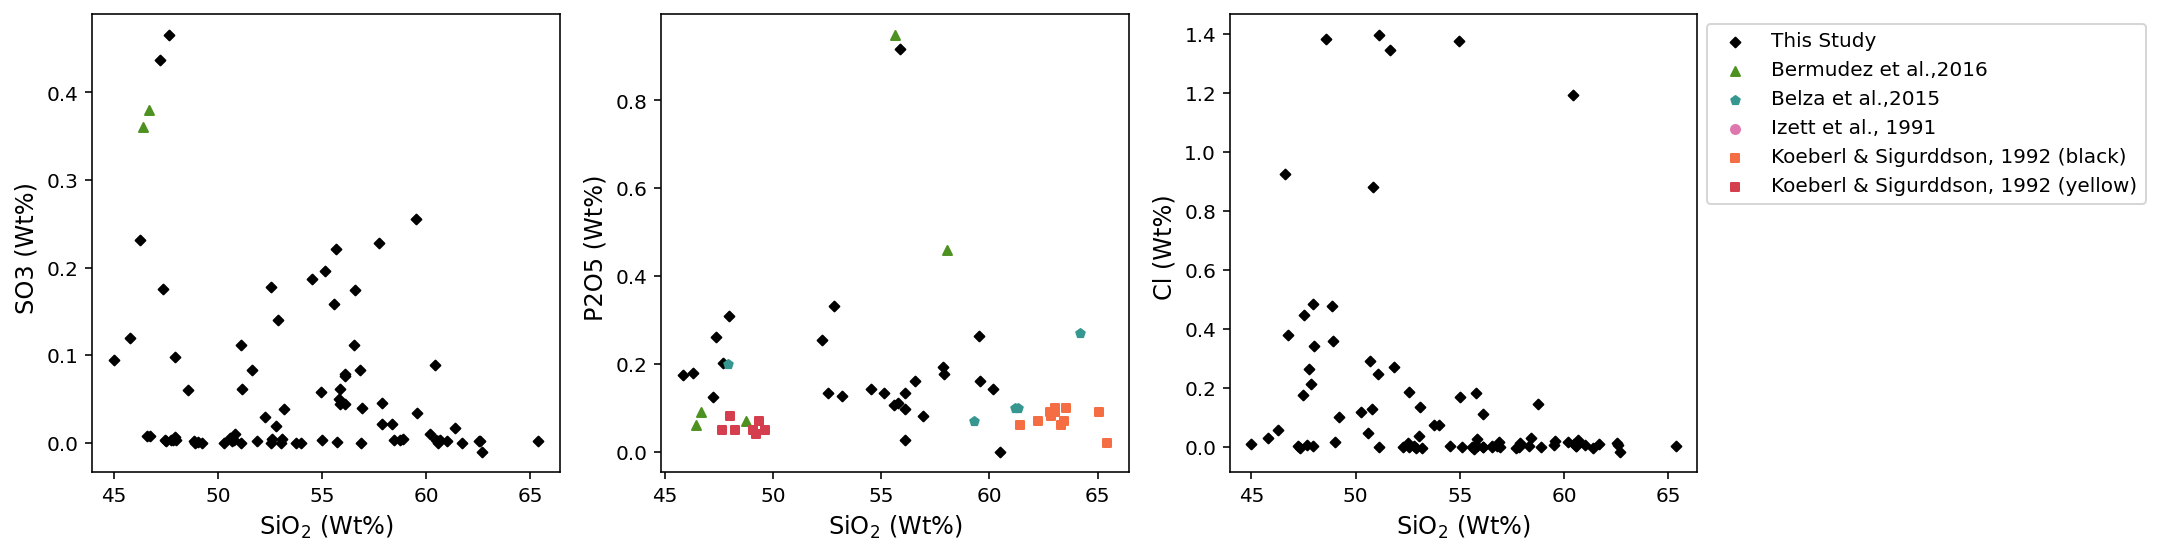

In [192]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

i=0
for ax in axs.reshape(-1): 
    ax.scatter(fin_data_sample_mean['SiO2'].tolist(), fin_data_sample_mean[volatiles[i]].tolist(),color = 'black', 
               s=12,label='This Study')
    ax.scatter(bermudez['SiO2'].tolist(), bermudez[volatiles[i]].tolist(), marker= '^',s=20,color = '#4d9221',
               label='Bermudez et al.,2016')
    ax.scatter(belza['SiO2'].tolist(), belza[volatiles[i]].tolist(), marker= 'p',s=20,color = '#35978f',
               label='Belza et al.,2015')
    ax.scatter(izett['SiO2'].tolist(), izett[volatiles[i]].tolist(), marker= 'o',s=20,color = '#de77ae',
               label='Izett et al., 1991')
    ax.scatter(kbrl_blck['SiO2'].tolist(), kbrl_blck[volatiles[i]].tolist(), marker= 's',s=20,color = '#f46d43',
               label='Koeberl & Sigurddson, 1992 (black)')
    ax.scatter(kbrl_ylw['SiO2'].tolist(), kbrl_ylw[volatiles[i]].tolist(), marker= 's',s=20,color = '#d53e4f',
               label='Koeberl & Sigurddson, 1992 (yellow)')
    ax.set_ylabel(volatiles[i]+ ' (Wt%) ')
    ax.set_xlabel('SiO$_2$ (Wt%)')

    i = i + 1


fig.tight_layout()
plt.legend(frameon=True)
#plt.savefig('/Volumes/GoogleDrive/My Drive/Renne_Reading/Tektites/harker_volatiles.pdf',dpi=300,
            #bbox_inches='tight')


range(0, 3)